In [1]:
import pandas as pd
import seaborn as sb
import statistics as st

In [2]:
# Importar os dados
dt = pd.read_csv('tempo.csv', sep=';')

In [3]:
dt.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [4]:
dt.tail()

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75,200.0,NaN,sim
10,sol,75,70.0,VERDADEIRO,sim
11,nublado,72,90.0,VERDADEIRO,sim
12,nublado,81,75.0,FALSO,sim
13,chuva,71,91.0,VERDADEIRO,nao


In [5]:
dt.shape

(14, 5)

In [6]:
# Explorar dados categoricos
agrup = dt.groupby(['Aparencia']).size()

In [7]:
agrup

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [8]:
agrup = dt.groupby(['Temperatura']).size()
agrup

Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

In [9]:
agrup = dt.groupby(['Umidade']).size()
agrup

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [10]:
agrup = dt.groupby(['Vento']).size()
agrup

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [11]:
agrup = dt.groupby(['Jogar']).size()
agrup

Jogar
nao    5
sim    9
dtype: int64

In [12]:
dt['Vento'].describe()

count        13
unique        2
top       FALSO
freq          7
Name: Vento, dtype: object

Text(0.5, 1.0, 'Temperatura')

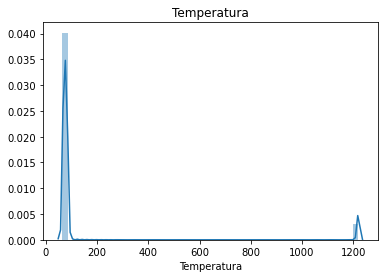

In [15]:
sb.distplot(dt['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Umidade')

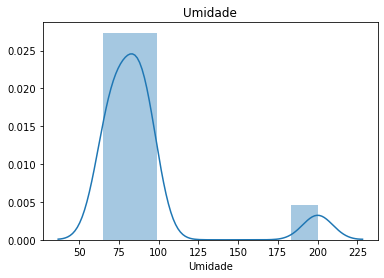

In [16]:
sb.distplot(dt['Umidade']).set_title('Umidade')

In [17]:
# verificar se há NAN
dt.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [18]:
mediana = st.median(dt['Umidade'])
mediana

85.5

In [19]:
# substituir os valores NAN pela mediana de umidade
dt['Umidade'].fillna(mediana, inplace=True)

In [20]:
# verificar se há NAN
dt.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          1
Jogar          0
dtype: int64

In [21]:
dt['Vento'].fillna('FALSO', inplace=True)

In [22]:
# verificar se há NAN
dt.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [24]:
mediana = st.median(dt['Temperatura'])
mediana

73.5

In [25]:
dt.loc[(dt['Temperatura'] > 1000), 'Temperatura'] = mediana

In [26]:
mediana = st.median(dt['Umidade'])
mediana

85.25

In [27]:
dt.loc[(dt['Umidade'] > 150), 'Umidade'] = mediana

In [28]:
dt.loc[dt['Aparencia'] == 'menos', 'Aparencia'] = "chuva"

In [29]:
dt.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim


In [30]:
dt.tail()

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,85.25,FALSO,sim
10,sol,75.0,70.00,VERDADEIRO,sim
11,nublado,72.0,90.00,VERDADEIRO,sim
12,nublado,81.0,75.00,FALSO,sim
13,chuva,71.0,91.00,VERDADEIRO,nao


In [32]:
dt

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.00,FALSO,nao
1,sol,80.0,90.00,VERDADEIRO,nao
2,nublado,83.0,86.00,FALSO,sim
3,chuva,70.0,85.50,FALSO,sim
4,chuva,68.0,80.00,FALSO,sim
5,chuva,65.0,70.00,VERDADEIRO,nao
6,chuva,64.0,65.00,VERDADEIRO,sim
7,sol,73.5,95.00,FALSO,nao
8,sol,69.0,70.00,FALSO,sim
9,chuva,75.0,85.25,FALSO,sim
